*An extension of hansel1 whereby a more generic approach is used for solving the problem by way of traversing an arbitrary node graph along a set of edges.*

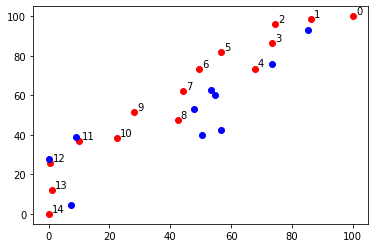

In [1]:
%run hansel1.ipynb

In [2]:
# This file is a part of the final year project "Story and Software" (CSC4006).
# Author: Konrad Mosoczy (Queen's University Belfast - QUB)
# https://github.com/konmos/csc4006 (also available on GitLab)
# ------------------------------------------------------------------------------
# This is the HG notebook implementation 2.

def walk_graph(nodes, edges, start, end):
    '''
    Traverse an arbitrary graph from a start node to an end node.
    Success is not guaranteed, nor is the generated path likely to be optimal.
    
    :param nodes: sequence of nodes
    :param edges: sequence of edges where an edge represents node visibility
    :param start: starting point
    :param end: end point
    :return: sequence of steps taken
    
    Example
    -------
    >>> nodes = [1, 2, 3]
    >>> edges = [(1, 2), (2, 3)]
    >>> walk_graph(nodes, edges, 1, 3)
    [1, 2, 3]
    '''
    last_node = start
    visited = [start]
    
    while last_node != end:
        visible_nodes = [
            [x for x in e if x != last_node][0] for e in edges if last_node in e
        ]
        
        unvisited = [n for n in visible_nodes if n not in visited]
        
        if not unvisited:
            break
        
        last_node = unvisited[0]  # pick first available node
        visited.append(last_node)
    
    return visited

In [3]:
# Construct a graph for demonstration purposes.
# The graph passed to `walk_graph`, however, can be any
# arbitrary graph defined by a set of nodes and a set of edges.
# Each edge reepresents node "visibility", i.e., an edge from node
# A to node B indicates that A is visible from B and vice versa.

edges = []
nodes = hansel.steps

for n in nodes:
    visible_locations = check_visibility(
        n.pos,
        [x.pos for x in nodes],
        RADIUS
    )
    
    pebbles = [
        x for x in nodes if x.pos in visible_locations
    ]
    
    edges.extend(frozenset((n, x)) for x in pebbles)

edges = [tuple(x) for x in set(edges)]

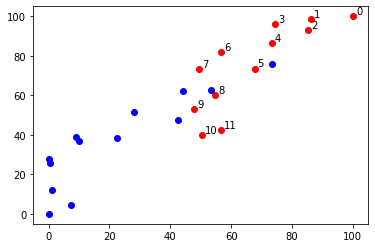

In [4]:
# Find the start and end pebble
end = [x for x in nodes if x.pos == (0, 0)][0]
start = [x for x in nodes if x.pos == (100, 100)][0]


visualize(hansel.steps, walk_graph(nodes, edges, start, end))